<a href="https://colab.research.google.com/github/DenisDrobyshev/university/blob/master/%2205_2025_%D0%94%D0%B8%D0%B0%D0%B3%D0%BD%D0%BE%D1%81%D1%82%D0%B8%D1%87%D0%B5%D1%81%D0%BA%D0%B0%D1%8F_%D1%80%D0%B0%D0%B1%D0%BE%D1%82%D0%B0_%E2%84%965_%D0%A4%D0%BE%D1%80%D0%BC%D0%B8%D1%80%D0%BE%D0%B2%D0%B0%D0%BD%D0%B8%D0%B5_%D1%8D%D0%BB%D0%B5%D0%BA%D1%82%D1%80%D0%BE%D0%BD%D0%BD%D1%8B%D1%85_%D1%82%D0%B0%D0%B1%D0%BB%D0%B8%D1%86_ipynb%22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Диагностическая работа №5. Формирование электронных таблиц**

## **Задание №1. Создание генератора числовых последовательностей**



Напишите функцию-генератор, которая создает последовательность простых чисел. Генератор должен выдавать простые числа по одному при каждом вызове функции next(). Используйте этот генератор для вывода первых 15 простых чисел и найдите их сумму.

In [ ]:
def is_prime(n):
    if n <= 1:
        return False
    if n == 2:
        return True
    if n % 2 == 0:
        return False
    for i in range(3, int(n**0.5) + 1, 2):
        if n % i == 0:
            return False
    return True

def prime_generator():
    num = 2
    while True:
        if is_prime(num):
            yield num
        num += 1
gen = prime_generator()
first_15_primes = [next(gen) for _ in range(15)]
sum_primes = sum(first_15_primes)
print("Первые 15 простых чисел:", first_15_primes)
print("Их сумма:", sum_primes)

Первые 15 простых чисел: [2, 3, 5, 7, 11, 13, 17, 19, 23, 29, 31, 37, 41, 43, 47]
Их сумма: 328


## **Задание №2. Оптимизация чтения крупных файлов**



Создайте csv-файл с данными о пользователях (имя, возраст, email) объемом не менее 400,000 записей. Напишите функцию-генератор, которая будет читать этот файл порциями (batches) и возвращать каждую порцию как список словарей. Сравните время обработки всего файла сразу и чтение порциями с использованием вашего генератора. Дополнительно рассчитайте среднее значение возраста пользователей.

In [ ]:
import pandas as pd
import numpy as np
import time
import csv

def generate_users_csv(filename, num_records=400_000):
    data = {
        'name': [f'User_{i}' for i in range(num_records)],
        'age': np.random.randint(18, 80, size=num_records),
        'email': [f'user_{i}@example.com' for i in range(num_records)]
    }
    df = pd.DataFrame(data)
    df.to_csv(filename, index=False)

generate_users_csv('users.csv')

def batch_reader(filename, batch_size=1000):
    with open(filename, 'r') as csvfile:
        reader = csv.DictReader(csvfile)
        batch = []
        for row in reader:
            batch.append(row)
            if len(batch) == batch_size:
                yield batch
                batch = []
        if batch:
            yield batch

def read_entire_file(filename):
    df = pd.read_csv(filename)
    return df

def process_in_batches(filename, batch_size=1000):
    total_age = 0
    total_users = 0
    for batch in batch_reader(filename, batch_size):
        total_users += len(batch)
        total_age += sum(int(user['age']) for user in batch)
    return total_age / total_users if total_users > 0 else 0

def process_with_pandas(filename, batch_size=1000):
    total_age = 0
    total_users = 0
    for chunk in pd.read_csv(filename, chunksize=batch_size):
        total_users += len(chunk)
        total_age += chunk['age'].sum()
    return total_age / total_users if total_users > 0 else 0

start_time = time.time()
df = read_entire_file('users.csv')
avg_age_full = df['age'].mean()
full_time = time.time() - start_time

start_time = time.time()
avg_age_batch = process_in_batches('users.csv')
batch_time = time.time() - start_time

start_time = time.time()
avg_age_pandas = process_with_pandas('users.csv')
pandas_time = time.time() - start_time

print(f"{full_time:.3f} сек |  {avg_age_full:.2f}")
print(f"{batch_time:.3f} сек | {avg_age_batch:.2f}")
print(f"{pandas_time:.3f} сек |  {avg_age_pandas:.2f}")

0.550 сек |  48.48
0.895 сек | 48.48
0.721 сек |  48.48


## **Задание №3. Сравнение производительности вычислений**



Напишите функцию для [сортировки слиянием (merge sort)](https://www.geeksforgeeks.org/merge-sort/) массива из 1,000,000 случайных целых чисел. Реализуйте три версии функции:
1. Последовательную (классический алгоритм)
2. С использованием ThreadPoolExecutor для параллельного слияния
3. С использованием multiprocessing для распределенной сортировки

Сравните время выполнения каждой версии и визуализируйте результаты в виде гистограммы.


Результаты:
5.54 сек
5.63 сек
6.58 сек


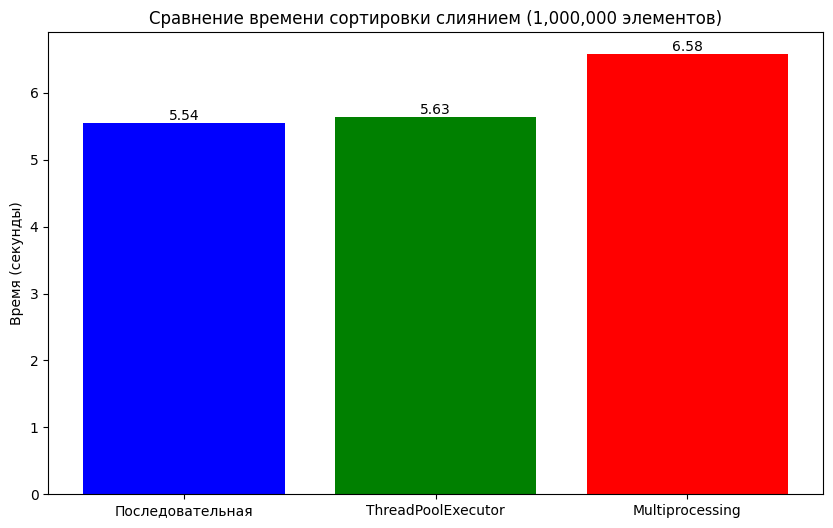

In [ ]:
import random
import time
import concurrent.futures
import multiprocessing
import matplotlib.pyplot as plt

def generate_random_array(size=1_000_000):
    return [random.randint(0, 10_000_000) for _ in range(size)]

def merge(left, right):
    result = []
    i = j = 0
    while i < len(left) and j < len(right):
        if left[i] < right[j]:
            result.append(left[i])
            i += 1
        else:
            result.append(right[j])
            j += 1
    result.extend(left[i:])
    result.extend(right[j:])
    return result

def sequential_merge_sort(arr):
    if len(arr) <= 1:
        return arr
    mid = len(arr) // 2
    left = sequential_merge_sort(arr[:mid])
    right = sequential_merge_sort(arr[mid:])
    return merge(left, right)

def parallel_merge_sort_threads(arr, threads=4):
    if len(arr) <= 1:
        return arr

    if len(arr) <= 100_000:
        return sequential_merge_sort(arr)

    mid = len(arr) // 2
    with concurrent.futures.ThreadPoolExecutor(max_workers=threads) as executor:
        future_left = executor.submit(parallel_merge_sort_threads, arr[:mid], threads)
        future_right = executor.submit(parallel_merge_sort_threads, arr[mid:], threads)
        left = future_left.result()
        right = future_right.result()
    return merge(left, right)

def merge_sort_worker(arr):
    if len(arr) <= 100_000:
        return sequential_merge_sort(arr)
    mid = len(arr) // 2
    left = merge_sort_worker(arr[:mid])
    right = merge_sort_worker(arr[mid:])
    return merge(left, right)

def parallel_merge_sort_processes(arr, processes=4):
    if len(arr) <= 1:
        return arr
    chunk_size = len(arr) // processes
    chunks = [arr[i*chunk_size:(i+1)*chunk_size] for i in range(processes-1)]
    chunks.append(arr[(processes-1)*chunk_size:])

    with multiprocessing.Pool(processes=processes) as pool:
        sorted_chunks = pool.map(merge_sort_worker, chunks)
    result = sorted_chunks[0]
    for chunk in sorted_chunks[1:]:
        result = merge(result, chunk)
    return result

def test_sorting_algorithms():
    arr = generate_random_array()
    start = time.time()
    sorted_seq = sequential_merge_sort(arr.copy())
    seq_time = time.time() - start
    start = time.time()
    sorted_threads = parallel_merge_sort_threads(arr.copy())
    threads_time = time.time() - start
    start = time.time()
    sorted_processes = parallel_merge_sort_processes(arr.copy())
    processes_time = time.time() - start
    assert sorted_seq == sorted_threads
    assert sorted_seq == sorted_processes

    return seq_time, threads_time, processes_time

def visualize_results(times):
    labels = ['Последовательная', 'ThreadPoolExecutor', 'Multiprocessing']
    plt.figure(figsize=(10, 6))
    bars = plt.bar(labels, times, color=['blue', 'green', 'red'])
    plt.title('Сравнение времени сортировки слиянием (1,000,000 элементов)')
    plt.ylabel('Время (секунды)')

    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.2f}',
                ha='center', va='bottom')

    plt.savefig('sorting_comparison.png')
    plt.show()
seq_time, threads_time, processes_time = test_sorting_algorithms()

print("\nРезультаты:")
print(f"{seq_time:.2f} сек")
print(f"{threads_time:.2f} сек")
print(f"{processes_time:.2f} сек")

visualize_results([seq_time, threads_time, processes_time])

## **Задание №4. Обработка числовых данных**


Сгенерируйте набор данных из 500 случайных чисел в диапазоне от 1 до 1000. Напишите функцию для нахождения всех простых чисел в этом наборе.

Реализуйте две версии:
1. Обычную последовательную функцию
2. Функцию с использованием multiprocessing для параллельной обработки

Сравните время выполнения обеих версий и подсчитайте количество найденных простых чисел.


In [ ]:
import random
import time
import multiprocessing

def is_prime(n):
    if n <= 1:
        return False
    elif n <= 3:
        return True
    elif n % 2 == 0 or n % 3 == 0:
        return False
    i = 5
    while i * i <= n:
        if n % i == 0 or n % (i + 2) == 0:
            return False
        i += 6
    return True

def find_primes_sequential(numbers):
    return [n for n in numbers if is_prime(n)]

def find_primes_parallel(numbers):
    with multiprocessing.Pool() as pool:
        results = pool.map(is_prime, numbers)
    return [num for num, prime in zip(numbers, results) if prime]

def generate_data(size=500, low=1, high=1000):
    return [random.randint(low, high) for _ in range(size)]


data = generate_data()
start_time = time.time()
primes_seq = find_primes_sequential(data)
time_seq = time.time() - start_time
start_time = time.time()
primes_par = find_primes_parallel(data)
time_par = time.time() - start_time
print(f"(последовательно): {len(primes_seq)}")
print(f"(параллельно): {len(primes_par)}")
print(f"{time_seq:.6f} секунд")
print(f"{time_par:.6f} секунд")

(последовательно): 83
(параллельно): 83
0.000224 секунд
0.062934 секунд


## **Задание №5. Создание электронной таблицы с графиками**











Напишите программу, которая:
1. Генерирует случайные данные о курсах 5 различных валют относительно рубля за последний год (по дням)
2. Сохраняет эти данные в Excel-файл на лист "Курсы валют"
3. Создает в этом же файле второй лист "Аналитика" с рассчитанными квартальными показателями (среднее, волатильность, корреляция между валютами)
4. Добавляет на третий лист "Графики" линейные графики динамики каждой валюты и столбчатую диаграмму средних значений по кварталам
5. Использует асинхронное программирование для параллельных расчетов по разным валютам

Используйте библиотеки pandas, matplotlib, openpyxl и xlsxwriter для визуализации и работы с Excel.

In [ ]:
!pip install pandas matplotlib openpyxl xlsxwriter numpy

In [ ]:
import multiprocessing
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import timedelta, datetime
from io import BytesIO

def generate_currency_data(name):
    print(f"[Multiprocessing] Генерация данных для {name}")
    start_date = datetime(2023, 1, 1)
    days = 365
    data = []
    current_date = start_date
    base_rate = random.uniform(50, 100)  # Начальный курс
    for _ in range(days):
        rate = max(10, base_rate + random.uniform(-1, 1))
        data.append((current_date, rate))
        base_rate = rate
        current_date += timedelta(days=1)

    df = pd.DataFrame(data, columns=["Дата", name])
    return df.set_index("Дата")

def calculate_quarterly_stats(df):
    quarterly = df.resample('Q').agg(['mean', 'std'])
    quarterly.columns = [f"{currency}_{stat}" for currency, stat in quarterly.columns.values]
    return quarterly

def save_charts_to_excel(writer, dfs):
    full_df = pd.concat([df for df in dfs], axis=1)
    plt.figure(figsize=(12, 6))
    for col in full_df.columns:
        plt.plot(full_df.index, full_df[col], label=col)
    plt.title("Динамика курсов валют")
    plt.xlabel("Дата")
    plt.ylabel("Курс")
    plt.legend()
    plt.grid(True)
    buf1 = BytesIO()
    plt.savefig(buf1, format='png')
    plt.close()

    quarterly_mean = full_df.resample('Q').mean()
    quarterly_mean.plot(kind='bar', figsize=(12, 6), title="Средние курсы по кварталам")
    plt.xticks(rotation=45)
    plt.tight_layout()
    buf2 = BytesIO()
    plt.savefig(buf2, format='png')
    plt.close()

    worksheet = writer.sheets['Графики']
    worksheet.insert_image('A1', 'line_plot.png', {'image_data': buf1})
    worksheet.insert_image('A20', 'bar_chart.png', {'image_data': buf2})

def main():
    CURRENCIES = ["USD", "EUR", "GBP", "JPY", "CNY"]

    with multiprocessing.Pool() as pool:
        dfs = pool.map(generate_currency_data, CURRENCIES)

    full_df = pd.concat([df for df in dfs], axis=1)

    file_path = "курсы_валют_multiprocessing.xlsx"
    with pd.ExcelWriter(file_path, engine='xlsxwriter') as writer:

        full_df.to_excel(writer, sheet_name="Курсы валют")

        quarterly_df = calculate_quarterly_stats(full_df)
        quarterly_df.to_excel(writer, sheet_name="Аналитика", startrow=0)

        corr = full_df.corr()
        corr.to_excel(writer, sheet_name="Аналитика", startrow=len(quarterly_df)+3)

        writer.sheets["Аналитика"].write(len(quarterly_df)+2, 0, "Корреляция между валютами")

        workbook = writer.book
        worksheet = workbook.add_worksheet("Графики")
        save_charts_to_excel(writer, dfs)

    print(f"Файл '{file_path}' успешно создан!")

main()

[Multiprocessing] Генерация данных для USD[Multiprocessing] Генерация данных для EUR

[Multiprocessing] Генерация данных для GBP
[Multiprocessing] Генерация данных для JPY
[Multiprocessing] Генерация данных для CNY


<ipython-input-21-d0011431c3de>:26: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly = df.resample('Q').agg(['mean', 'std'])
<ipython-input-21-d0011431c3de>:44: FutureWarning: 'Q' is deprecated and will be removed in a future version, please use 'QE' instead.
  quarterly_mean = full_df.resample('Q').mean()


Файл 'курсы_валют_multiprocessing.xlsx' успешно создан!
